In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("D:/Acadview training notes/housing1.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


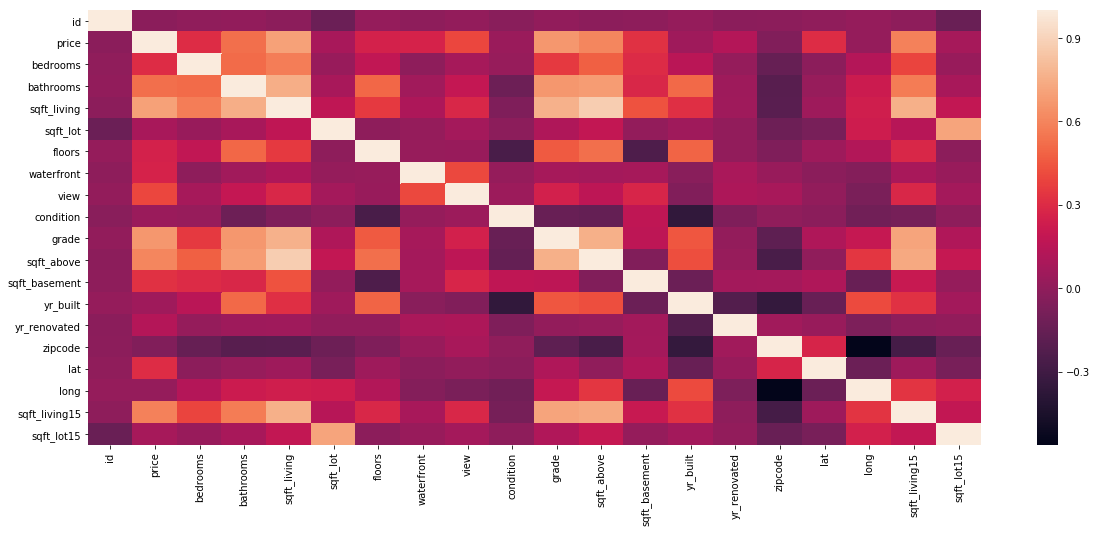

In [19]:
plt.figure(figsize=(20,8))
corr = df.corr()
sns.heatmap(corr)
plt.show()

In [125]:
df_numerics = df.select_dtypes(include = [np.number])
df_for_LR = df_numerics.loc[:,['sqft_living','price']]
df_for_LR.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


In [127]:
# log normalization 
df_for_LR = np.log(df_for_LR)
df_for_LR.head()
X=np.array(df_for_LR["sqft_living"]).reshape(21613,1)
y=np.array(df_for_LR["price"]).reshape(21613,1)

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 0)


In [139]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
y_pred = regressor.predict(X_test)

In [131]:
regressor.intercept_

array([ 1.61775294])

In [132]:
regressor.coef_

array([[ 0.47041357]])

In [133]:
df = pd.DataFrame({'Actual':list(y_test),'Predicted':list(y_pred)})
df.head()

,Actual,Predicted
0,[2.53381485602],[2.55064300913]
1,[2.65827636792],[2.62163336081]
2,[2.58319987958],[2.55109399216]
3,[2.59195473226],[2.53514542566]
4,[2.60764399984],[2.59973592997]


In [140]:
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred)

0.00088227566800768407

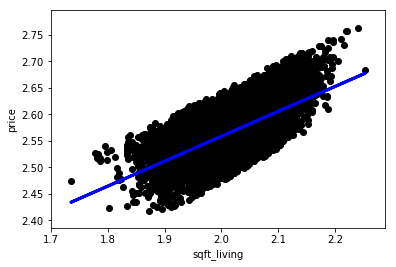

In [146]:
plt.scatter(X, y,  color='black')
plt.plot(X,regressor.predict(X), color='blue', linewidth=3)
plt.xlabel('sqft_living')
plt.ylabel('price')


plt.show()